ilustracao-de-sql-de-design-plano-desenhado-a-mao_23-2149243382.avif

#ANÁLISE EXPLORATÓRIA DE DADOS DE CRÉDITO - PROJETO SQL

## 1\. Introdução

Este projeto tem por objetivo a exploração e análise de dados de crédito, usando as aplicações da linguagem SQL, iremos utilizar o ambiente da AWS Athena, da Amazon.

**Se quiser saber mais sobre o AWS Athena da Amazon, basta clicar nesse link: [Athena-Amazon](https://aws.amazon.com/pt/athena/)**

##**SQL: Uma breve história**

A linguagem SQL (Structured Query Language) foi desenvolvida na década de 1970 por um grupo de pesquisadores da IBM, liderado por Donald D. Chamberlin e Raymond F. Boyce. Originalmente chamada de SEQUEL (Structured English QUEry Language), seu propósito era manipular e gerenciar dados em bancos de dados relacionais.

O SQL foi baseado na álgebra relacional e no cálculo relacional de conjuntos, e foi adotado como uma linguagem padronizada para interagir com sistemas de gerenciamento de bancos de dados relacionais. Ele permite a realização de operações como consultas, inserções, atualizações e exclusões de dados em um banco de dados.

Ao longo dos anos, o SQL evoluiu e se tornou a linguagem padrão para a maioria dos sistemas de gerenciamento de bancos de dados relacionais (RDBMS), como Oracle, MySQL, PostgreSQL, SQL Server e muitos outros. A linguagem SQL é conhecida por sua capacidade de manipular dados de forma eficiente e oferecer uma sintaxe relativamente simples e poderosa para consultas e administração de bancos de dados.

Hoje o SQL se tornou uma das linguagens essenciais para a análise de dados do mundo, desempenhando um papel fundamental. E sendo indispensável o conhecimento da mesma pelos profissionais da área de tecnologia. Neste projeto iremos utilizar algumas de suas funcionalidades e aplicações em nossa análise com o banco de dados escolhido.

## 2\. Dados Utilizados

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

- Idade = idade do cliente

- Sexo = sexo do cliente (F ou M)

- Dependentes = número de dependentes do cliente

- Escolaridade = nível de escolaridade do clientes

- Salario_anual = faixa salarial do cliente

- Tipo_cartao = tipo de cartao do cliente

- Qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

- Interacoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

- Meses_inativo_12m = quantidade de meses que o cliente ficou inativo

- Limite_credito = limite de credito do cliente

- Valor_transacoes_12m = valor das transações dos ultimos 12 meses

- Qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses


A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

**Vale ressaltar que foram utilizados apenas uma parte dos dados disponibilizados acima, é uma sub-amostra do dataset, para fins de aprendizado.**

## 3\. Criação da Tabela

Para começar o projeto, foi criada uma pasta no ambiente da AWS Athena no S3, chamada  "credito-projeto-tayara" no S3,  com a nossa fonte de dados citada acima, o arquivo credito.csv

No AWS Athena foi executado o seguinte comando:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://credito-projeto-tayara/'
TBLPROPERTIES ('has_encrypted_data'='false');
```

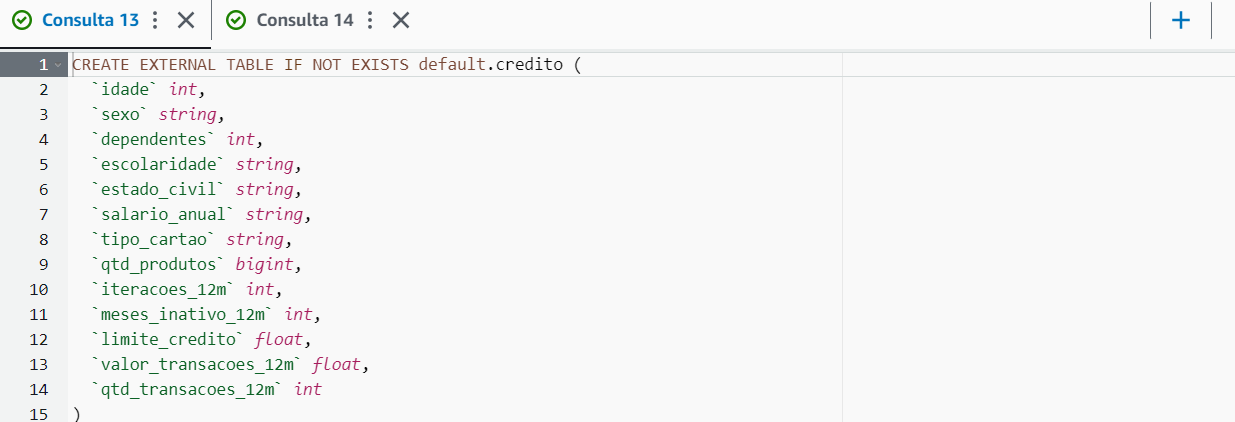

Consulta realizada com sucesso. Nossa tabela foi criada! : )

## 4\. Exploração de Dados

- **Visualização da tabela**

Query:  **select * from credito limit 10;**

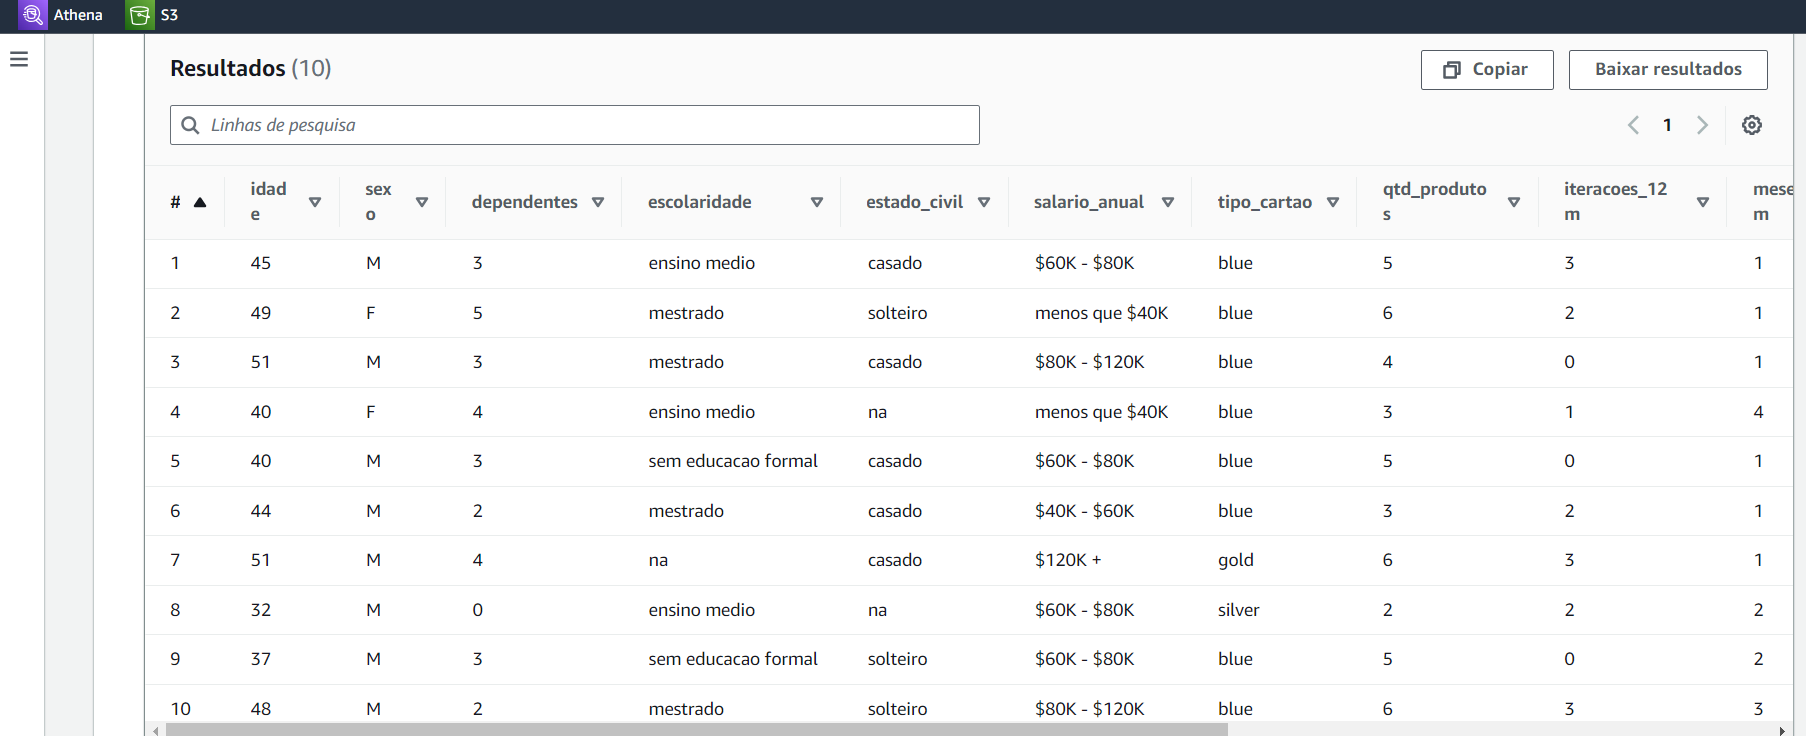


- **Contagem da tabela**

É importante, pois é possível conferir se foram carregadas todas as linhas do arquivo CSV, nossa fonte de dados.

Query: **select count(*) from credito**

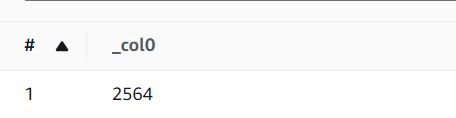

Número de linhas correto, de acordo com o arquivo CSV.

- **Descrição dos tipos das colunas**

É importante verificar, quais são os tipos de dados que temos nas colunas.

Query: **DESCRIBE credito**

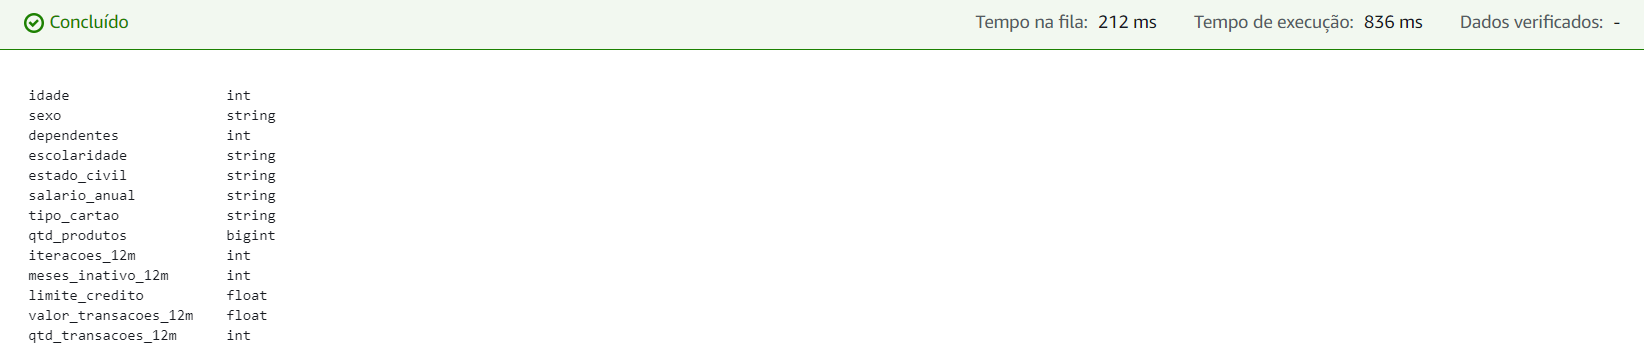

- **Verificação de categorias**

É possível ver se existem valores nulos, o que é essencial para uma manipulação assertiva dos dados. Vamos selecionar a coluna escolaridade como exemplo, usando a função **select distinct** que me mostra quais são os valores únicos dentro dessa coluna.

Query: **SELECT DISTINCT escolaridade FROM credito**

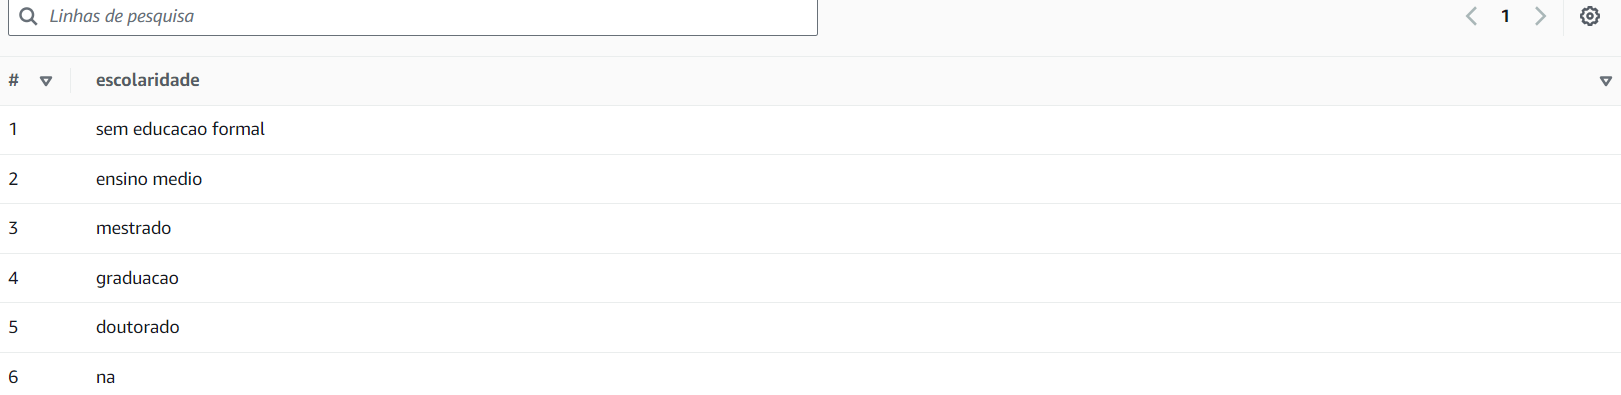

Temos cinco categorias na coluna escolaridade. No índice nº 6, consta um valor nulo, o valor "na". Pode ser algum erro de cadastro, ou somente uma informação que não existe. Podemos fazer a mesma função para outras colunas, verificando se existem mais valores nulos. Iremos tratá-los.

## 5\. Análise Exploratória de Dados

### **Algumas perguntas de negócio**

** Quantas pessoas eu tenho para cada faixa salarial?*

Query: **select count(*), salario_anual from credito group by salario_anual**

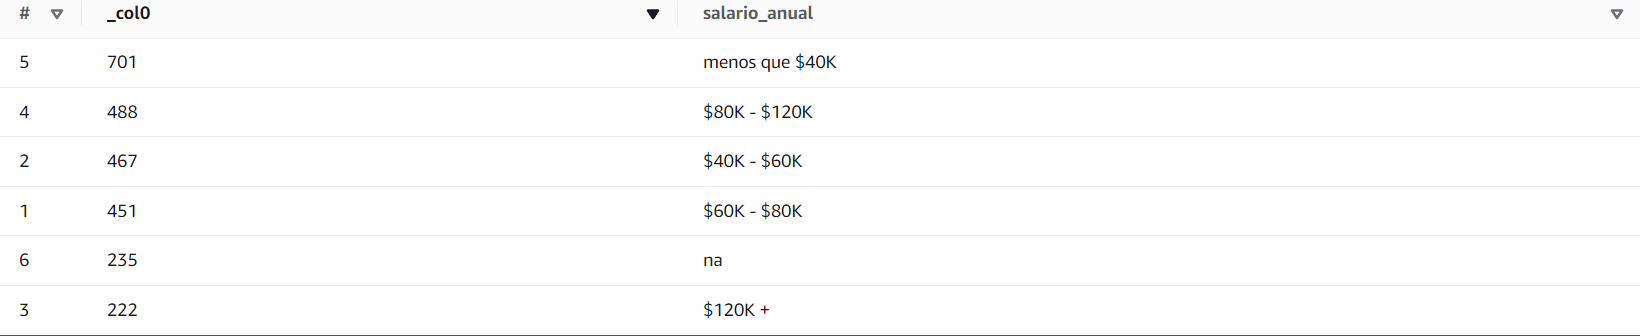

No comando executado, solicitei que fosse feito um agrupamento através da função **group by** referente ao salário anual. Também foi usada a função **count** para contagem.

**Insigts:**
- Pode-se observar, que existem uma grande quantidade de clientes, 701, que ganham menos de $40k.

- Temos 235 clientes com valores nulos referente a esta coluna (informação importante).
- A minoria, 222 clientes, com a faixa salarial mais alta.

** Qual o tipo de cartão com maior número de clientes?*

Query: **select count(*), tipo_cartao from credito group by tipo_cartao**

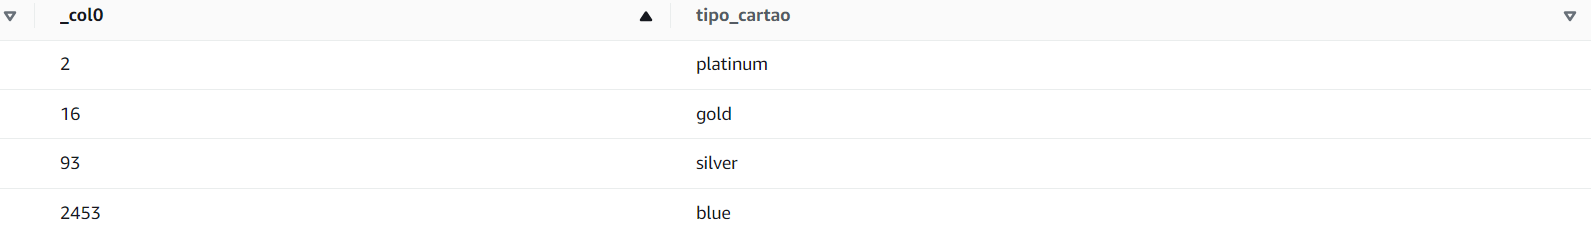

**Insigts:**
- A maioria dos clientes dessa empresa, possuem o cartão blue. Pode ser que seja esse cartão, que os clientes que ganham até $40k por ano, utilizem.

**Qual a quantidade de homens e mulheres?*

Query: **select count(*), sexo from credito group by sexo**

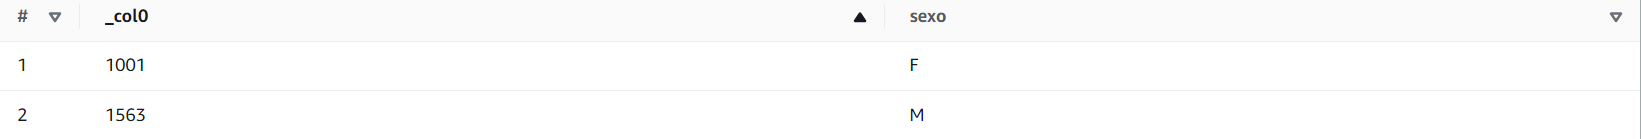

**Insight**:
- Temos uma proporção maior do sexo masculino, uma diferença até considerável. Tal informação deve ser considerada na análise, já que temos uma proporção maior de homens na base de dados.

**Quais são as idades mínimas e máximas do nosso banco?*

Query: **select min(idade) as "Idade_Minima", max(idade) as "Idade_Máxima" from credito**

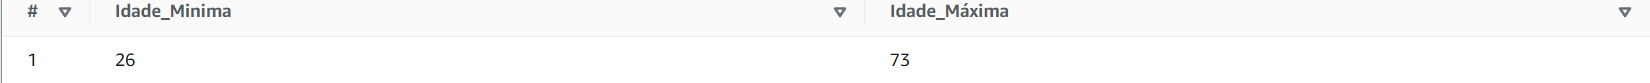

**E por sexo?*

Query: **SELECT sexo, MIN(idade) AS "Idade_Minima", MAX(idade) AS "Idade_Maxima" FROM credito GROUP BY sexo ORDER BY "Idade_Minima"**

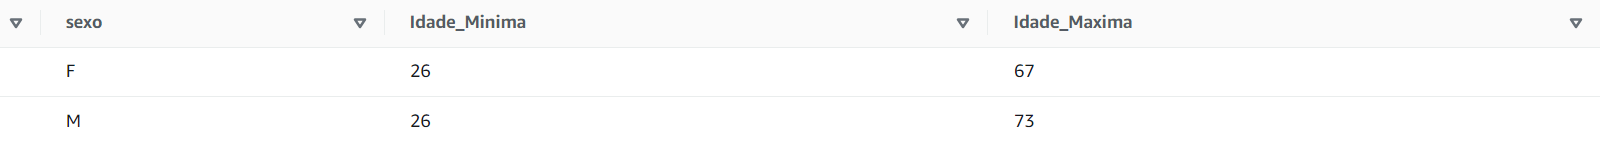

**Qual o valor mínimo e o valor máximo gasto pelos clientes do banco?*

Query: **select min(valor_transacoes_12m) as "Valor_Minimo", max(valor_transacoes_12m) as "Valor_Máximo" from credito**

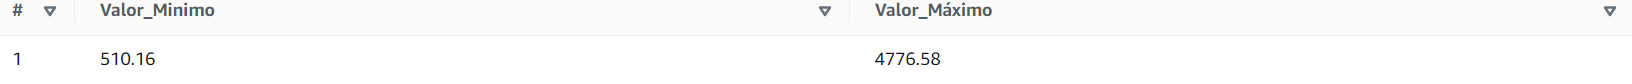

**Qual o limite de crédito concedido, avaliando, escolaridade, sexo e tipo de cartão?*

**OBS: Vamos excluir as informações nulas.**

Query: **select max(limite_credito) as limite_credito, escolaridade, tipo_cartao,
sexo from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade,
tipo_cartao, sexo
order by limite_credito desc
limit 10**

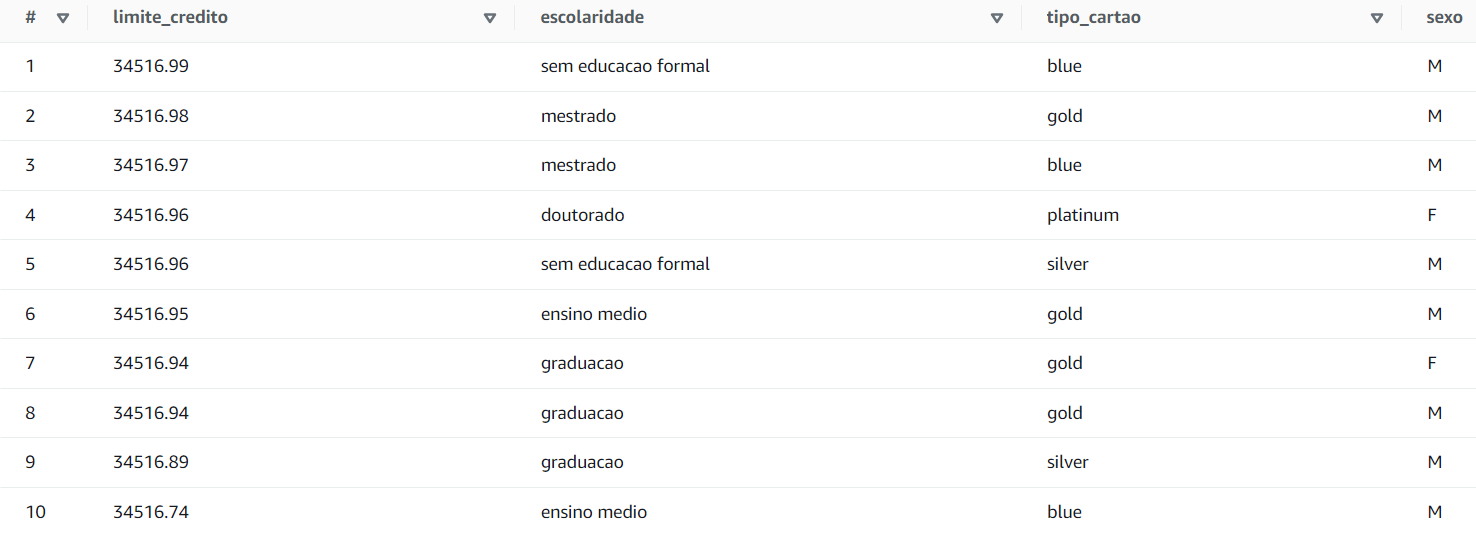

**Insigts:**
- Os homens possuem os maiores limites de crédito.
- Temos outra informação interessante, pois não é possível observar alguma relação entre o limite de crédito concedido, e a escolaridade. Uma vez que, o cliente com o maior limite de crédito, consta como sem educação formal. Geralmente isso é levado em conta por algumas instituições financeiras, que associam quem tem um grau alto de escolaridade, que tenha uma renda maior, e consequentemente, pode gastar mais no cartão.
- No restante dos dados, podemos afirmar que realmente não deve ter relação, já que a escolaridade dos 10 primeiros clientes, é bem variada.
- É válido observar também, que a bandeira do cliente com o maior limite de crédito é blue, e não outra bandeira que geralmente tem a classificação mais alta no mercado.

**Vamos analisar mais profundamente o salario anual por sexo?*

Query: **SELECT salario_anual,MAX(salario_anual) AS faixa_salarial, sexo FROM credito WHERE salario_anual != 'na'GROUP BY salario_anual,sexo ORDER BY salario_anual DESC**

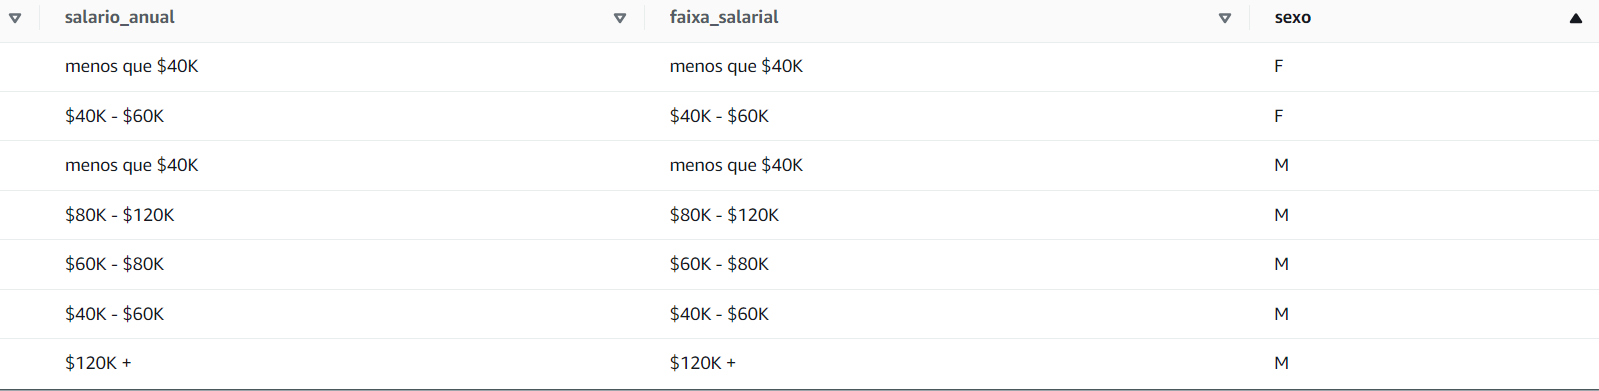

**Insigts:**
- Uma informação relevante, as mulheres aparecem apenas nas faixas de menos de 40k e  de 40k a 60k.
- A partir da faixa salarial de 60k a mais de 120k, aparecem apenas os homens.

**Quem gasta mais, homens ou mulheres?*

Query: **select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo**

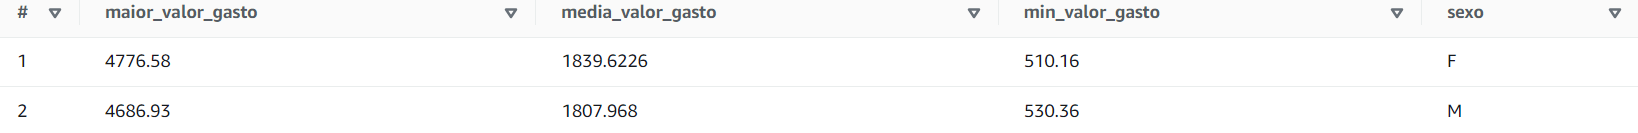

**Insigts:**
- Embora as mulheres apareçam como maior valor gasto e maior média de valor gasto, não é viável afirmar que nesse dataset, elas gastem mais do que os homens. Já que a diferença é muito pouca, é muito similar os valores gastos de ambos os sexos.


**Qual a média do valor das transações, de homens e mulheres, com o salário anual?*

Query: **select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc**

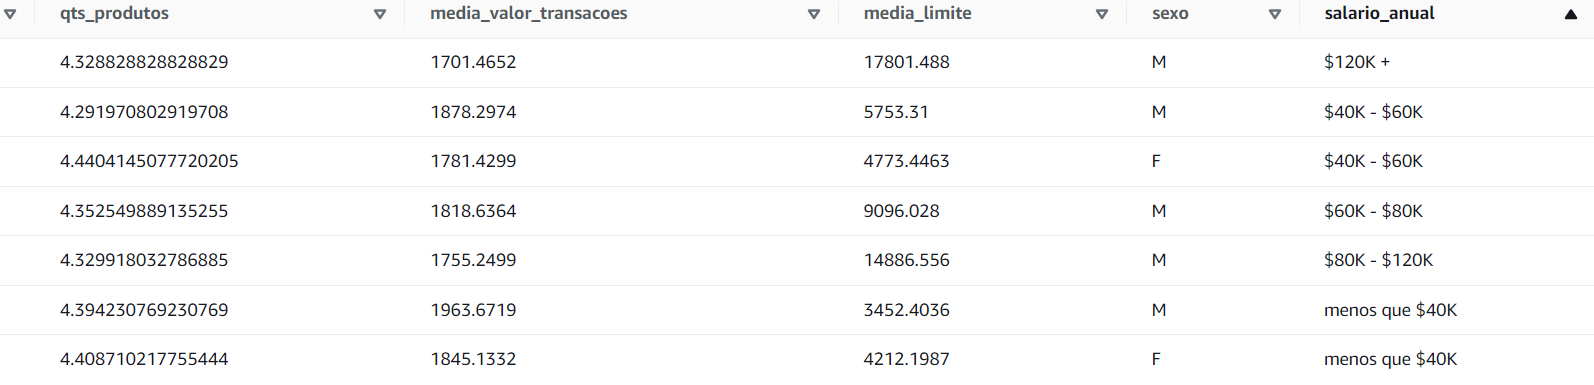

**Insigts:**
- No grupo de clientes que ganham menos de 40k por ano, as mulheres tem uma média de limite maior do que os homens. A média de valor de transações é similar, assim como a quantidade de produtos.
- A próxima faixa salarial, de 40k a 60k, é possível ver uma diferença de quase 1.000 de média de limite, entre homens e mulheres. Sendo a dos homens maior.
- Nas faixas salariais de 60k até 120k só temos informações do sexo masculino.
- Ganhando acima de 120k por ano, apenas os homens aparecem em nossa tabela.

**O salário impacta no limite?*

Query: **select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc**

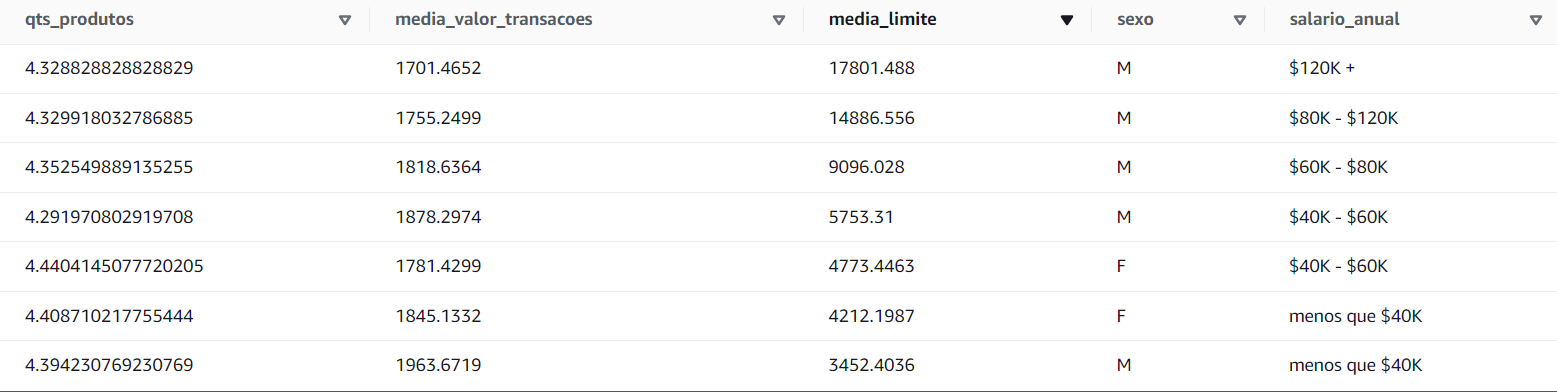

**Insigts:**
- Sim! As pessoas que tem menor faixa salarial, também apresentam menor limite de crédito.


**Quais as caracteristicas dos clientes que possuem os menores créditos?*

Query: **select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade!='na' group by escolaridade,tipo_cartao, sexo order by limite_credito asc**

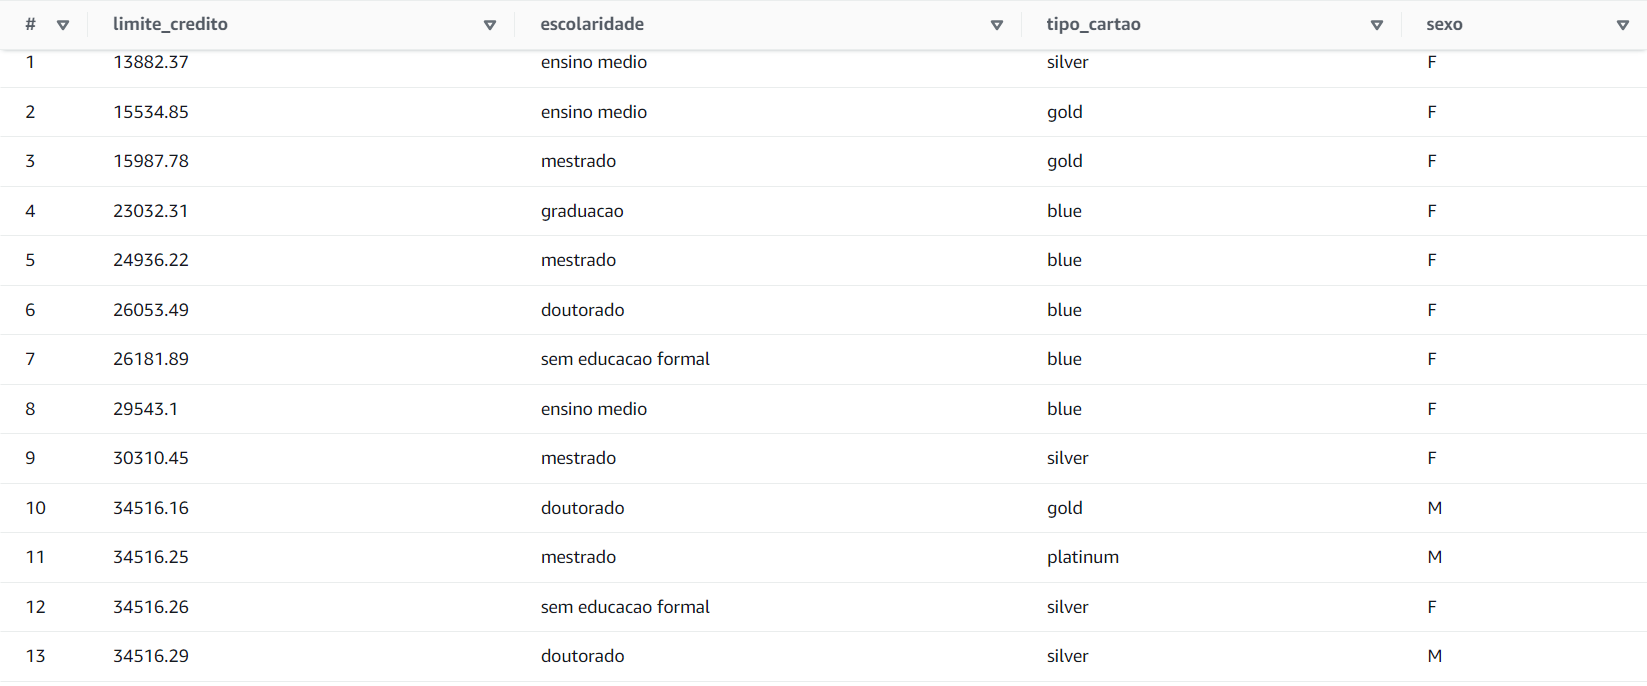

**Insigts:**
- Temos um insigt bastante interessante nessa query. As mulheres ocupam até a 9º posição tendo os menores limites de crédito.
- Importante observar também, que a escolaridade não parece interferir nesse aspecto, já que temos escolaridades diversificadas.
- A bandeira do cartão também parece não interferir nesse quesito.
- Os homens aparecem apenas na 10º posição com os menores limites de crédito.

**Quem ficou com indice maior de meses de compras inativas?*

Query: **SELECT sexo, MAX(meses_inativo_12m) AS qtd_meses_inativo_maximo FROM credito GROUP BY sexo**

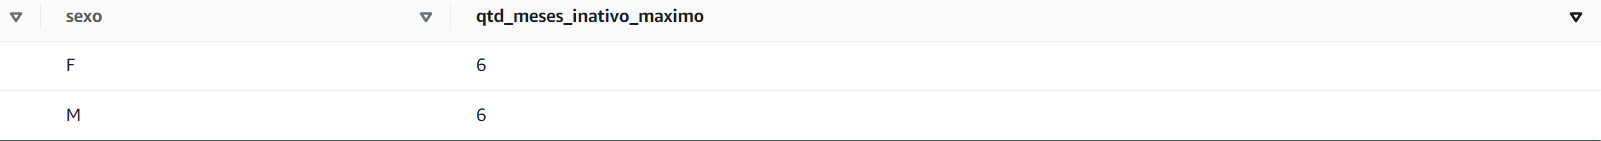

- Interessante, temos um empate!

**Quem teve maior quantidade de transações nos últimos 12 meses?*

Query: **SELECT sexo, MAX(qtd_transacoes_12m) as quantidade_transacoes_12_meses FROM credito GROUP BY sexo**

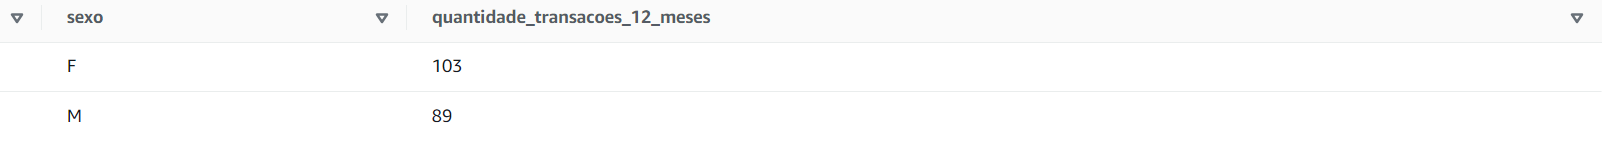

- As mulheres aqui ganharam por pouco.

**Será que a quantidade de tipos de cartão por sexo, nos traz alguma informação relevante?*

Query: **SELECT sexo,tipo_cartao,COUNT(*) AS total_por_tipo_cartao FROM credito GROUP BY sexo, tipo_cartao ORDER BY sexo, total_por_tipo_cartao DESC**

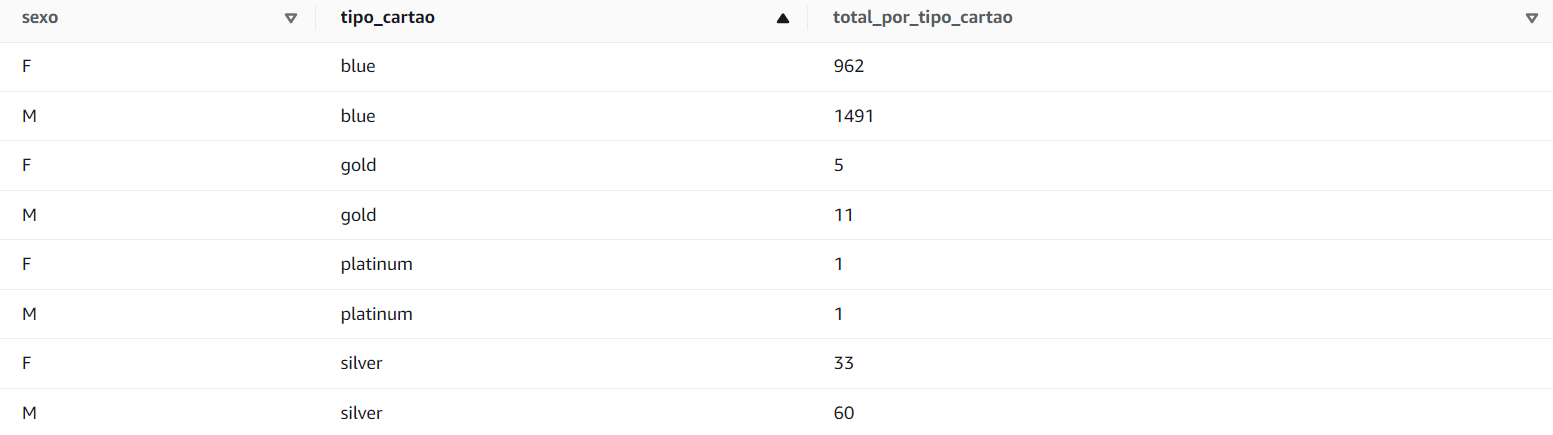

**Insigts:**
- Na verdade não. Não podemos esquecer que nosso dataset tem uma quantidade maior de clientes do sexo masculino, logo é natural que eles tenham maior representatividade nas bandeiras dos cartões. Levando em conta que a diferença na quantidade não é grande em relação as mulheres.
- Vale ressaltar que temos apenas dois clientes com cartão platinum, um homem e uma mulher.

## 6\. Conclusão

Utilizando comandos simples, foram extraidas diversas informações relevantes, foi possível ver o poder das querys!

Dentre as análises extraídas do dataset crédito, podemos destacar algumas com maior relevância:
- Os homens tem uma faixa salarial maior que as mulheres.
- As mulheres ocupam até a 9º posição tendo um limite de crédito menor que os homens.
- Os clientes com menor faixa salarial, também possuem os menores limites de créditos.
- A maior parte dos clientes possui renda de até 40k.
- A maior parte dos clientes é do sexo masculino.
- Os clientes que possuem maior limite de crédito são em maioria do sexo masculino.
- A escolaridade não parece influenciar nem no limite, nem no tipo de cartão.
- Não existem clientes com salario anual acima de 60k do sexo feminino.

**Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Para que assim seja possível, executar medidas para mudanças nos processos do Banco, para que tenha um aumento de crédito para o sexo feminino. Lembrando que devemos sempre analisar todos os cenários, para tomar a decisão mais assertiva!**


**Ressaltando que nosso banco de dados é fictício, usado apenas para fins de estudo.**

**Se quiser saber mais sobre a autora do projeto, basta clicar em [Perfil Tayara Jesus](https://www.linkedin.com/in/tayarajesus/)**